# 数据连接和清洗

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# 分析对象路径
folder_path = r'F:\collection_spb_info\GJ\DY'
# 检测信息对象路径
data_path = r'F:\collection_spb_info\ZK\BC'

In [3]:
# 基础信息表
base_point = r"F:\collection_spb_info\GJ\DY\base_info_1159.xlsx"
# 表层检测信息表
data_point = r"F:\collection_spb_info\ZK\BC\bc_chemical_info4.xlsx"
# 剖面检测信息表
data_point2 = r"F:\collection_spb_info\ZK\PM\pm_chemical_info.xlsx"

In [4]:
# 点位信息列表
info_list = ['ydbh','dwjd','dwwd']
# 理化指标列表
phy_che_list = ['ydbh','yjz','ph','ylzjhl',
                'qdan','qlin','qjia','qxi',
                'yxlin','sxjia','hxjia','yxliu','yxgui','yxtie','yxmeng','yxtong','yxxing','yxpeng','yxmu','zgong','zshen','zqian','zge','zge2','znie',
                'jxzc11','jxzc12','jxzc13','jxzc14','jxzc1trzd']

In [5]:
# 读取信息
df_base = pd.read_excel(base_point,usecols=info_list)
df_data = pd.read_excel(data_point,usecols=phy_che_list)

In [6]:
df_data2 = pd.read_excel(data_point2,usecols=phy_che_list)

In [7]:
# 连接BC表
df_result_bc = pd.merge(df_base,df_data,on='ydbh',how='inner')

In [8]:
# 连接PM表
df_result_pm = pd.merge(df_base, df_data2, on='ydbh', how='inner')

In [9]:
# 合并BC和PM表
df_result = pd.concat([df_result_bc, df_result_pm], axis=0)

In [ ]:
# 找出ydbh重复的索引
duplicates = df_result.duplicated(subset=['ydbh'], keep=False)
df_duplicates = df_result[duplicates]
df_duplicates

In [11]:
# 去除重复数据
df_result.drop_duplicates(subset=['ydbh'], keep='first', inplace=True)

In [12]:
# 替换指定列中的非数值型值为0.0001
for one_col in phy_che_list[1:-1]:
    df_result[one_col] = pd.to_numeric(df_result[one_col], errors='coerce').fillna(0.0001)

In [13]:
# 保存数据
df_result.to_excel(r"F:\float_data\DY\dy_result.xlsx",index=False)
df_result.to_csv(r"F:\float_data\DY\dy_result.csv",index=False)

# 查看数据

In [14]:
df_result.columns

Index(['ydbh', 'dwjd', 'dwwd', 'ph', 'ylzjhl', 'yjz', 'qdan', 'qlin', 'qjia',
       'qxi', 'yxlin', 'sxjia', 'hxjia', 'yxliu', 'yxgui', 'yxtie', 'yxmeng',
       'yxtong', 'yxxing', 'yxpeng', 'yxmu', 'zgong', 'zshen', 'zqian', 'zge',
       'zge2', 'znie', 'jxzc11', 'jxzc12', 'jxzc13', 'jxzc14', 'jxzc1trzd'],
      dtype='object')

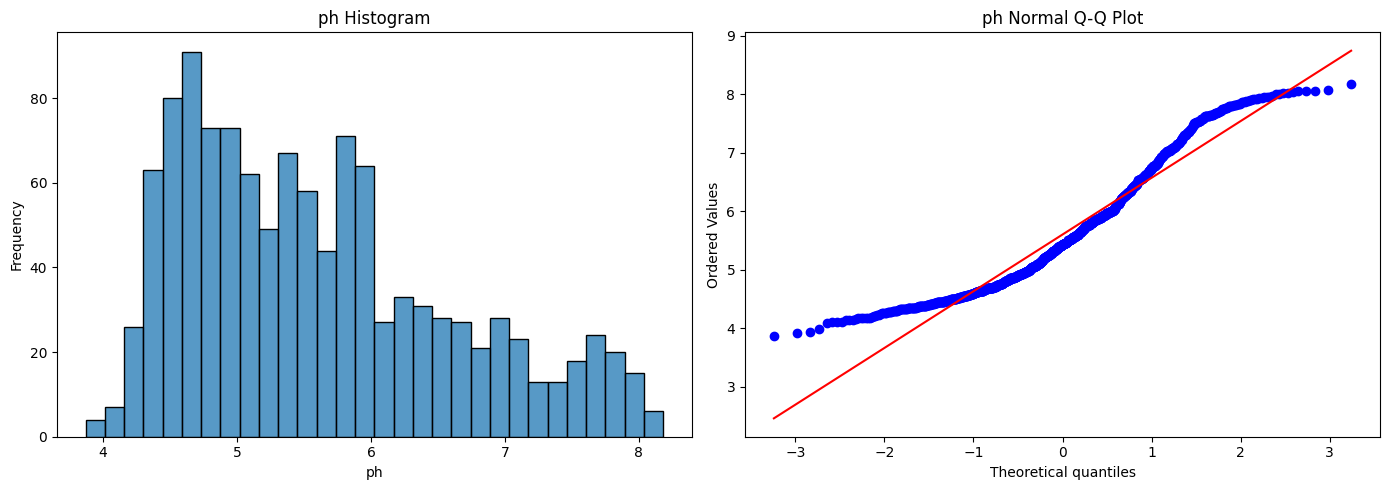

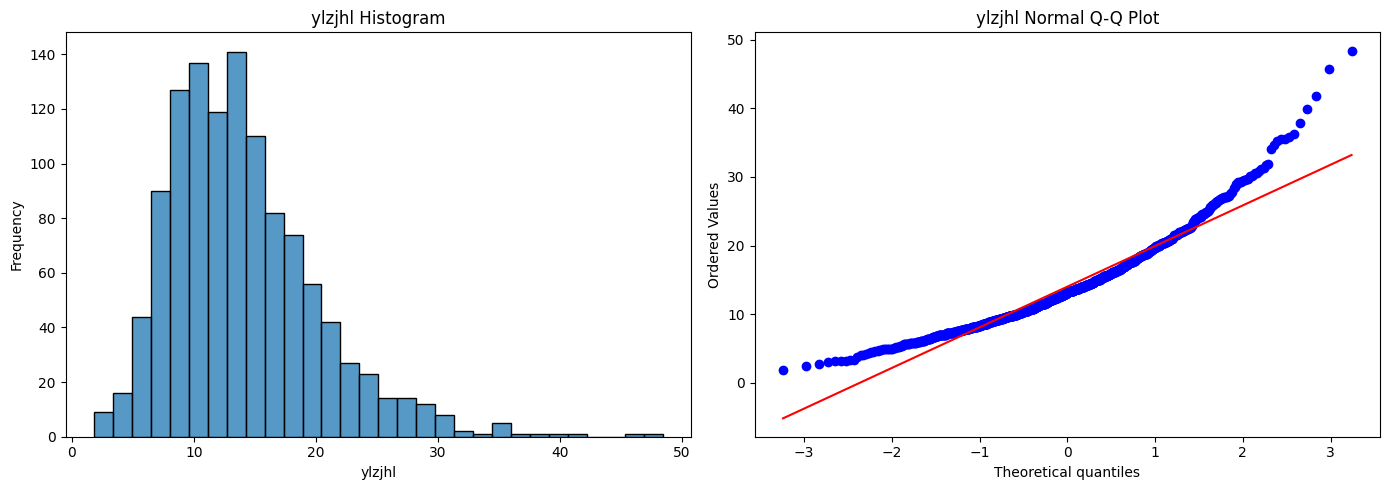

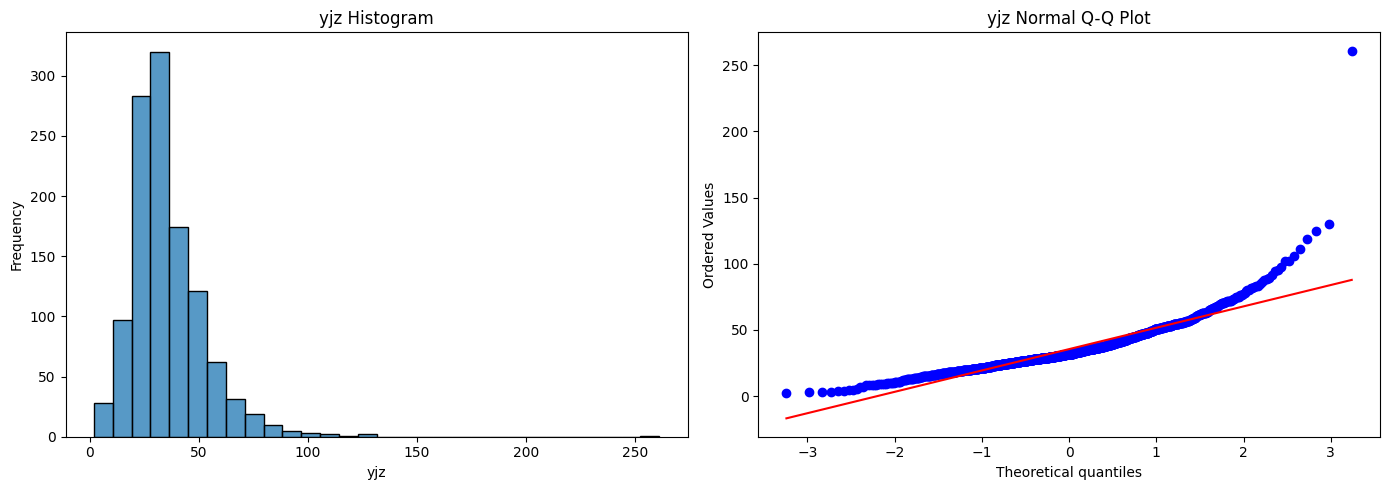

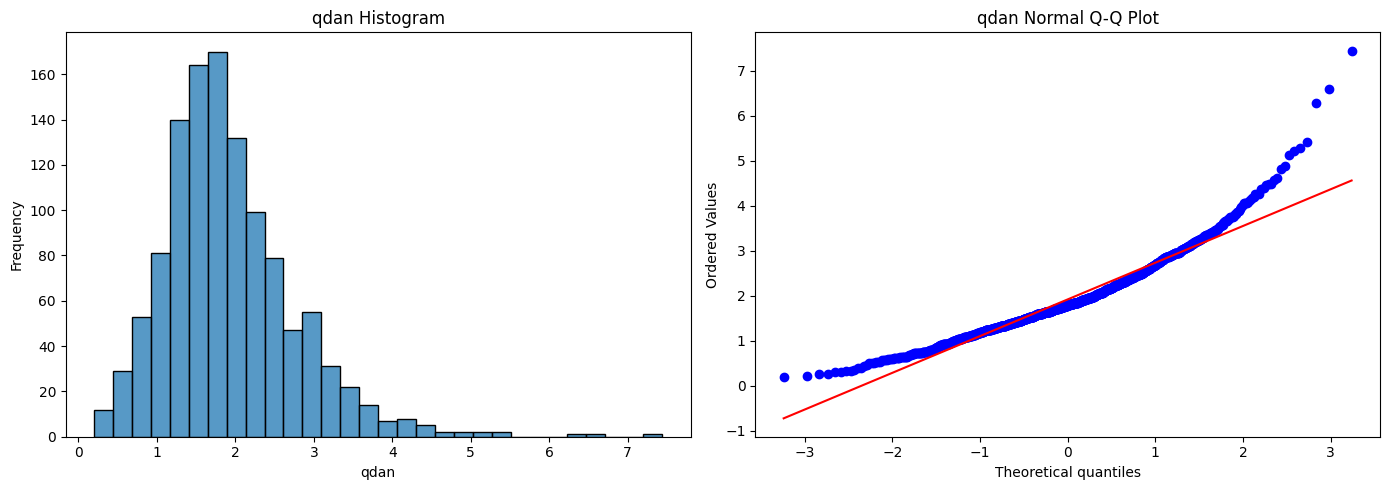

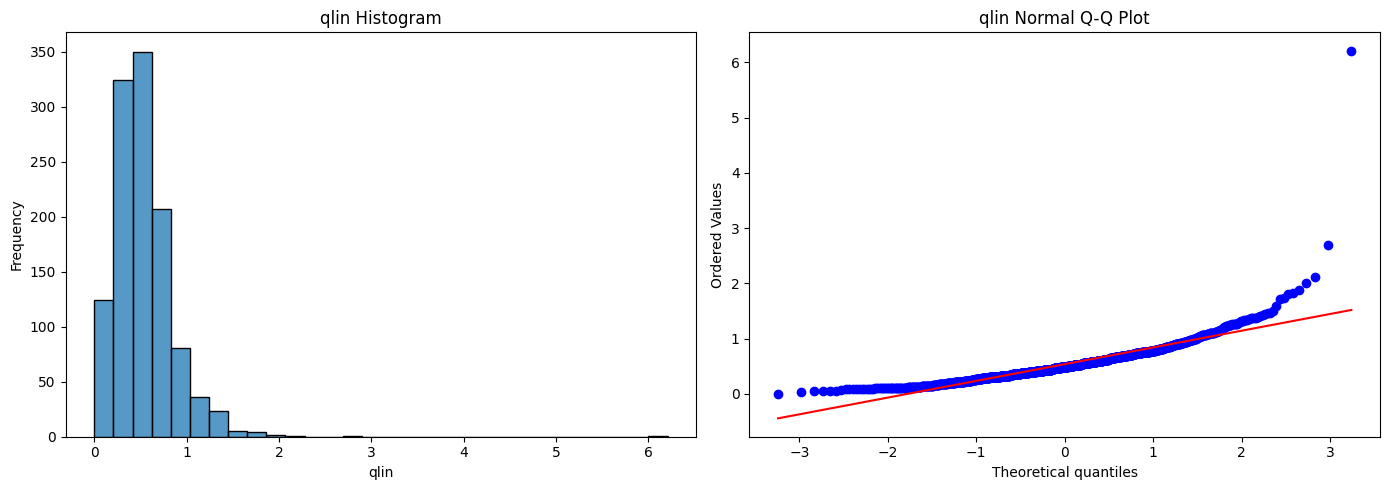

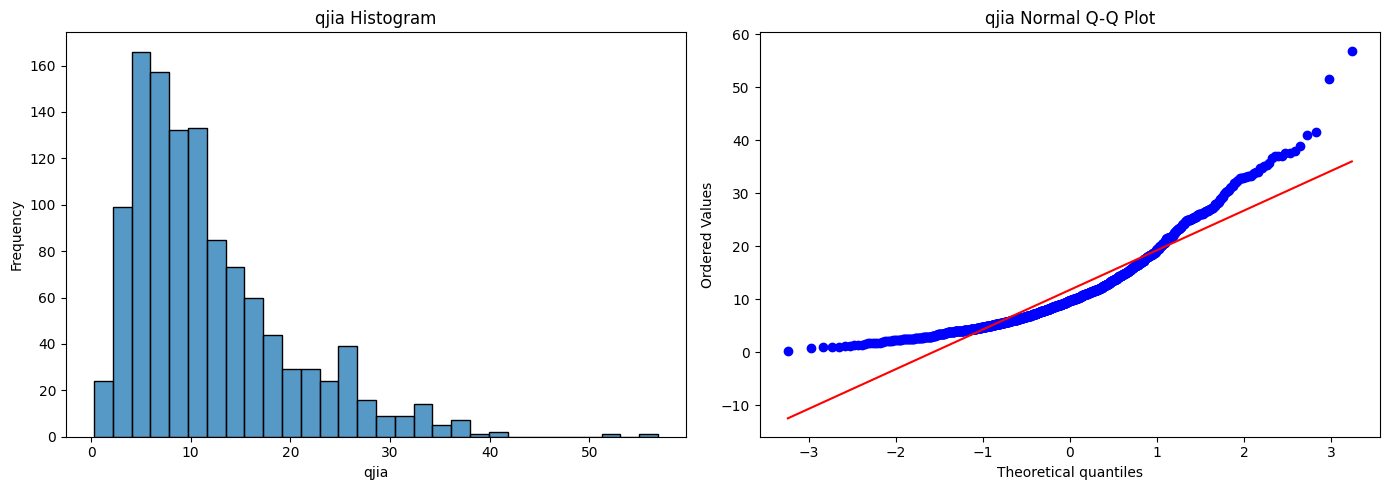

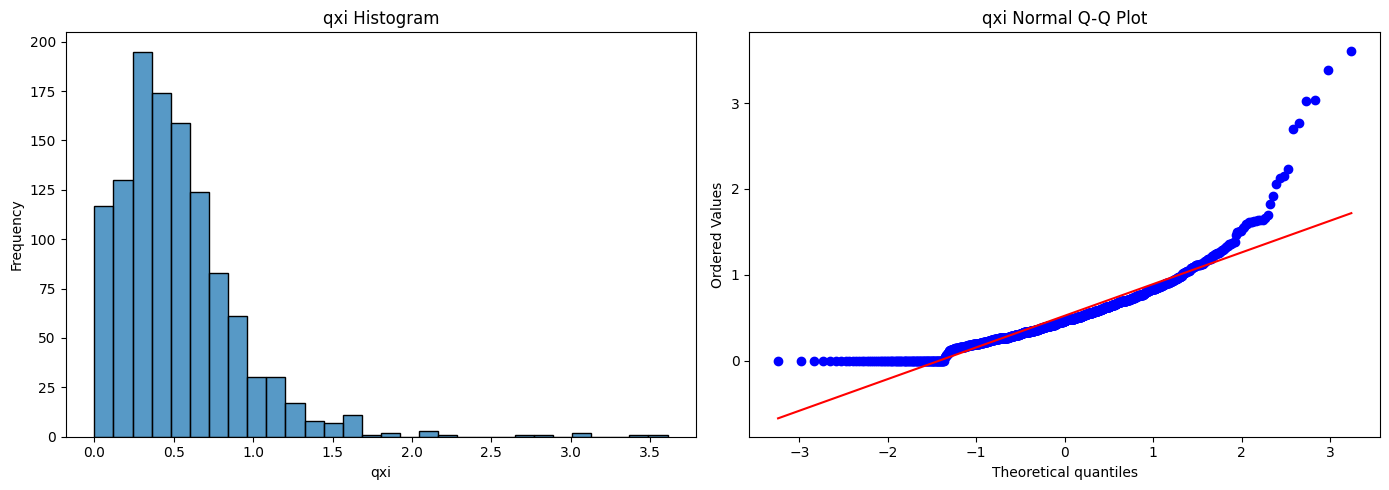

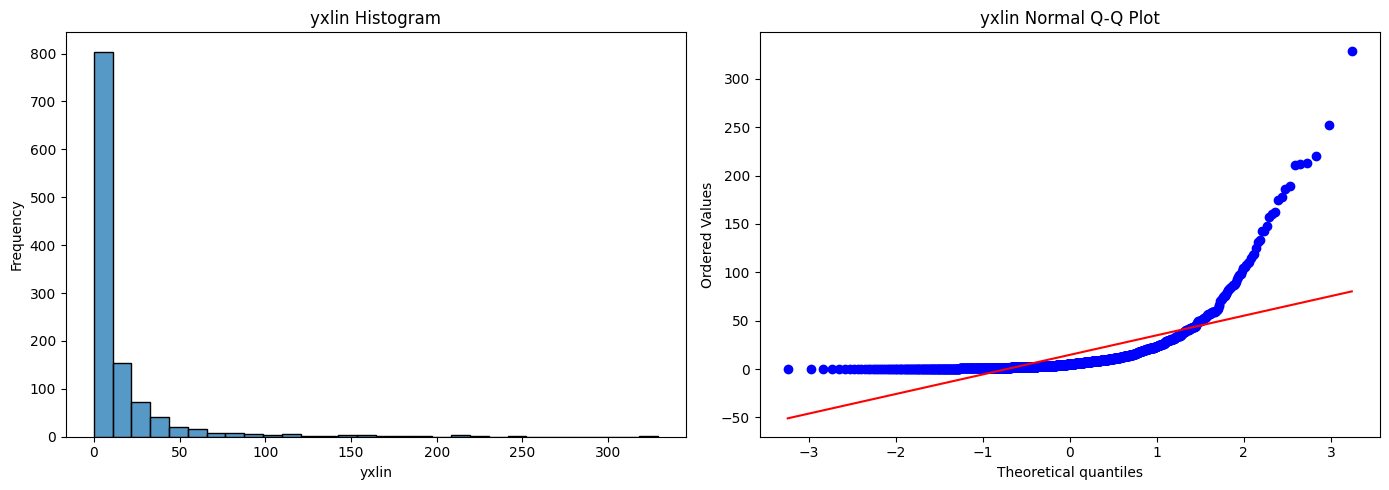

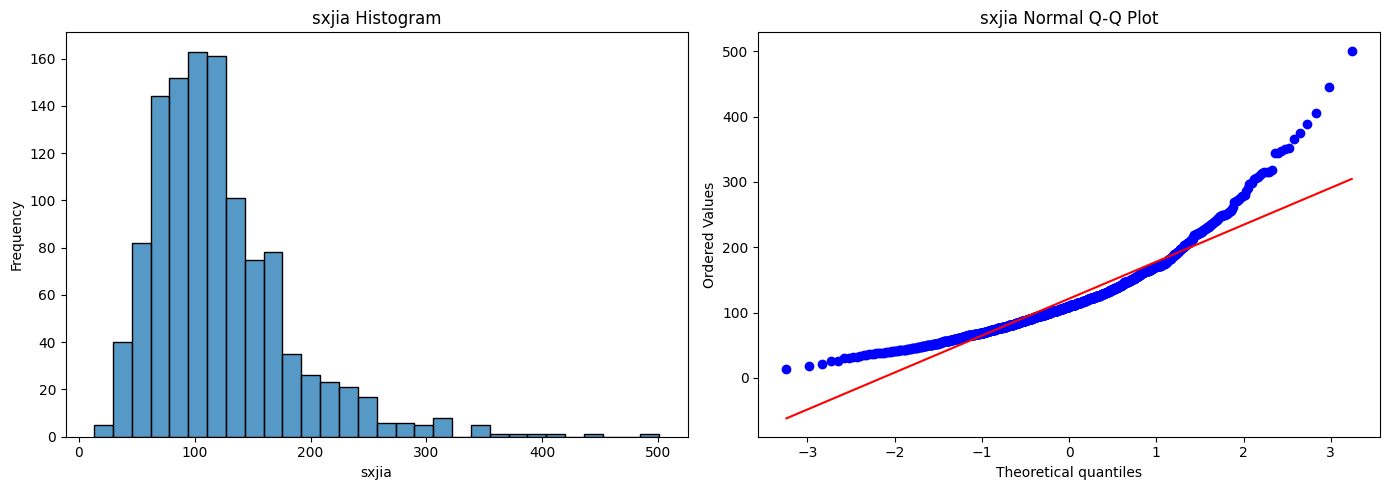

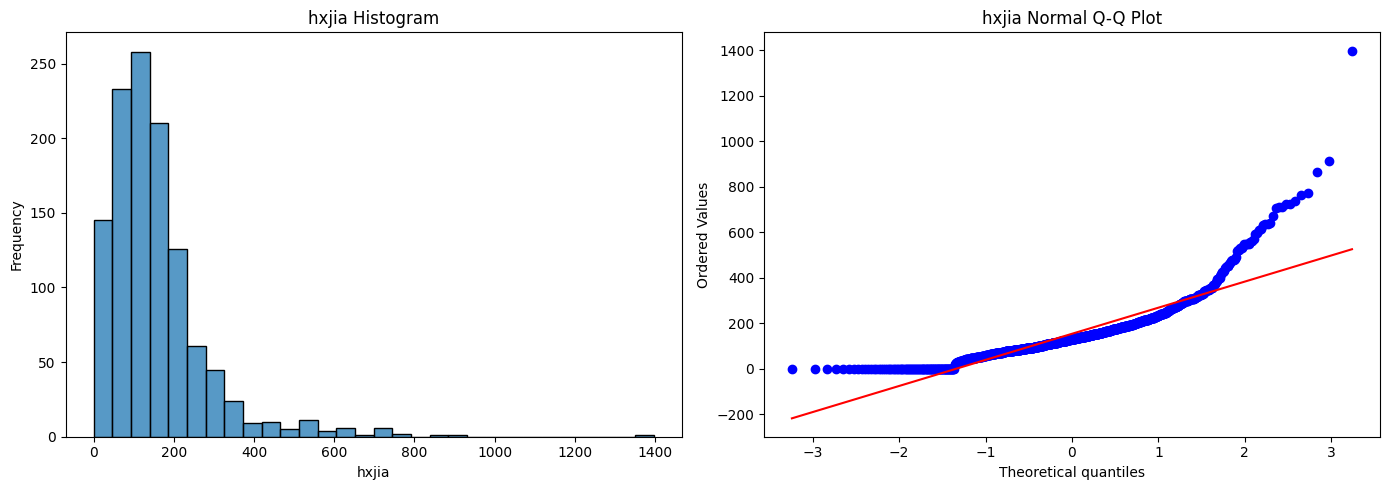

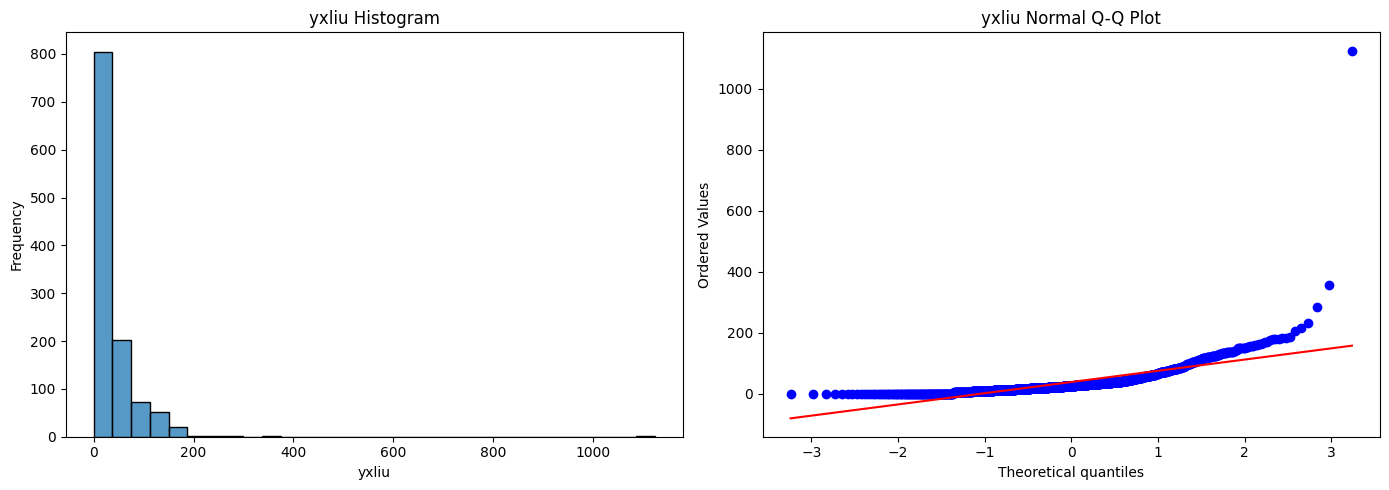

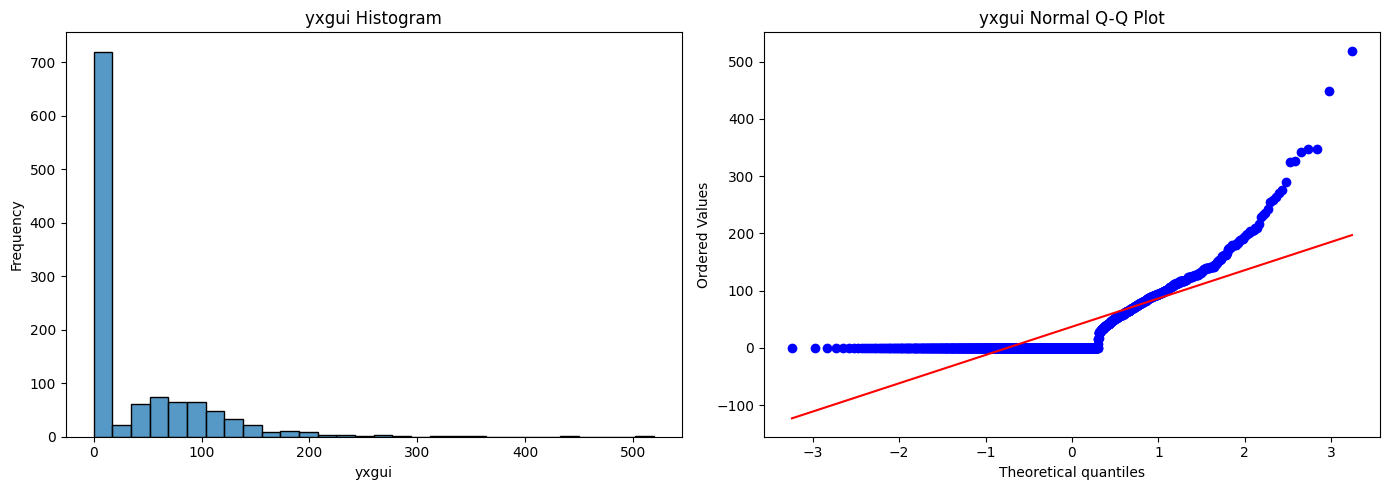

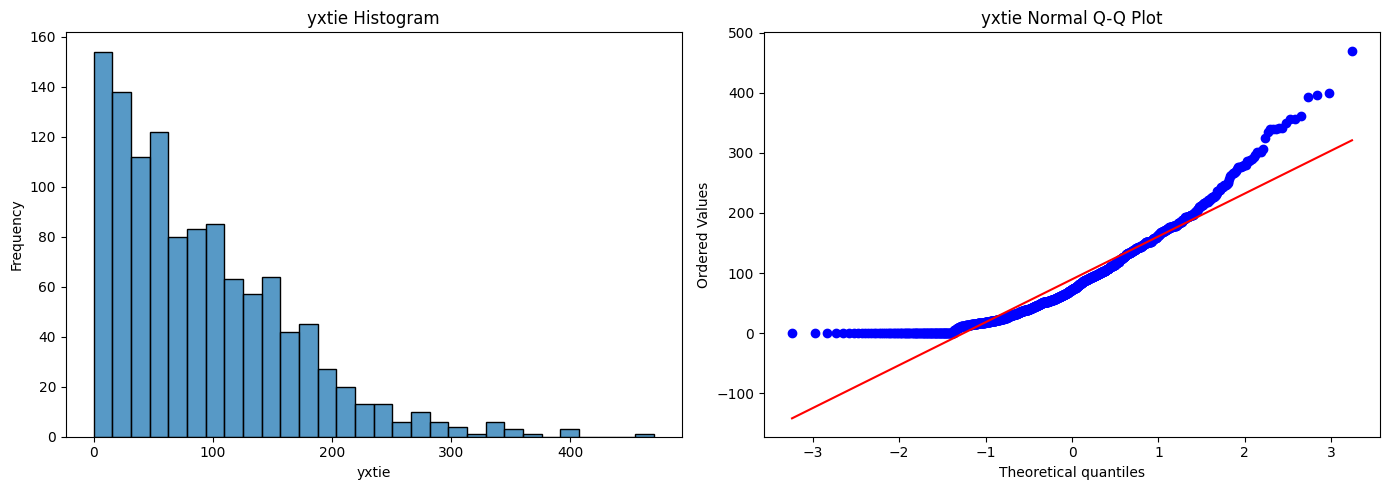

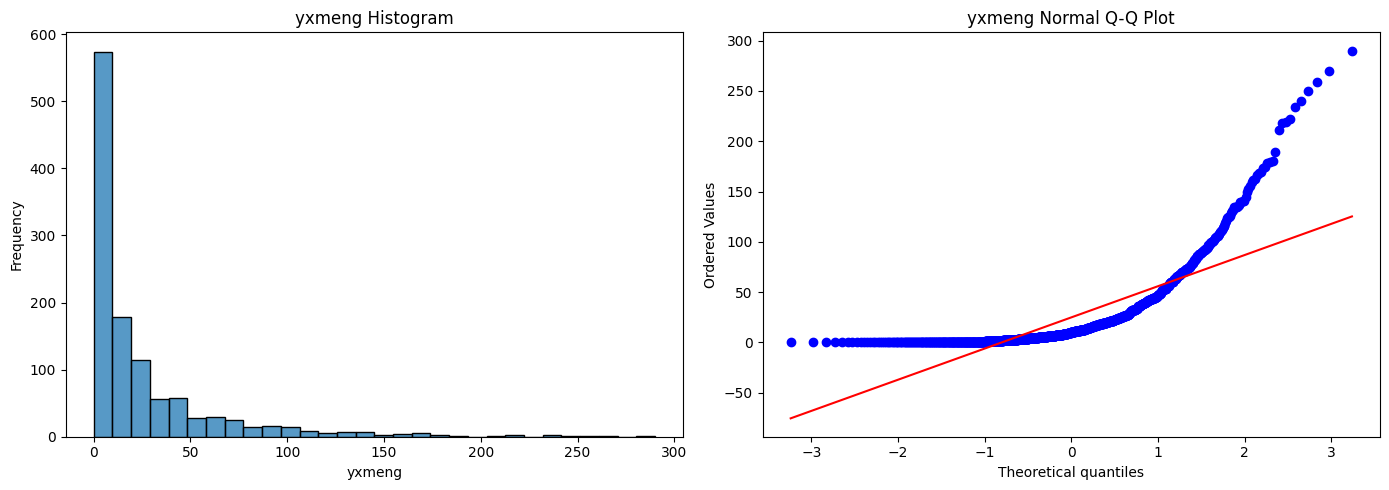

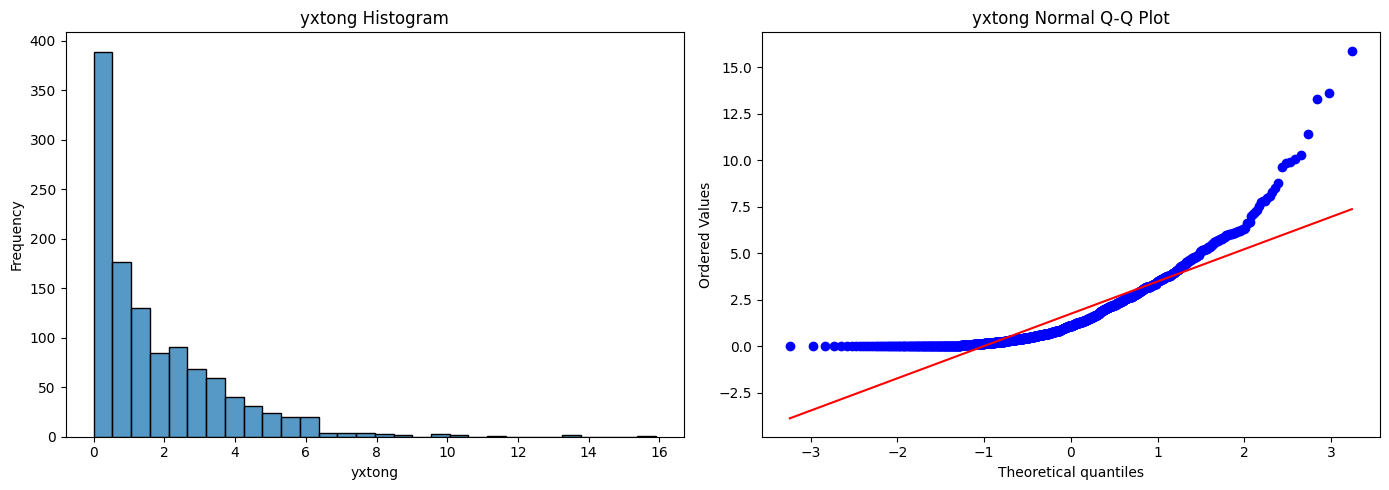

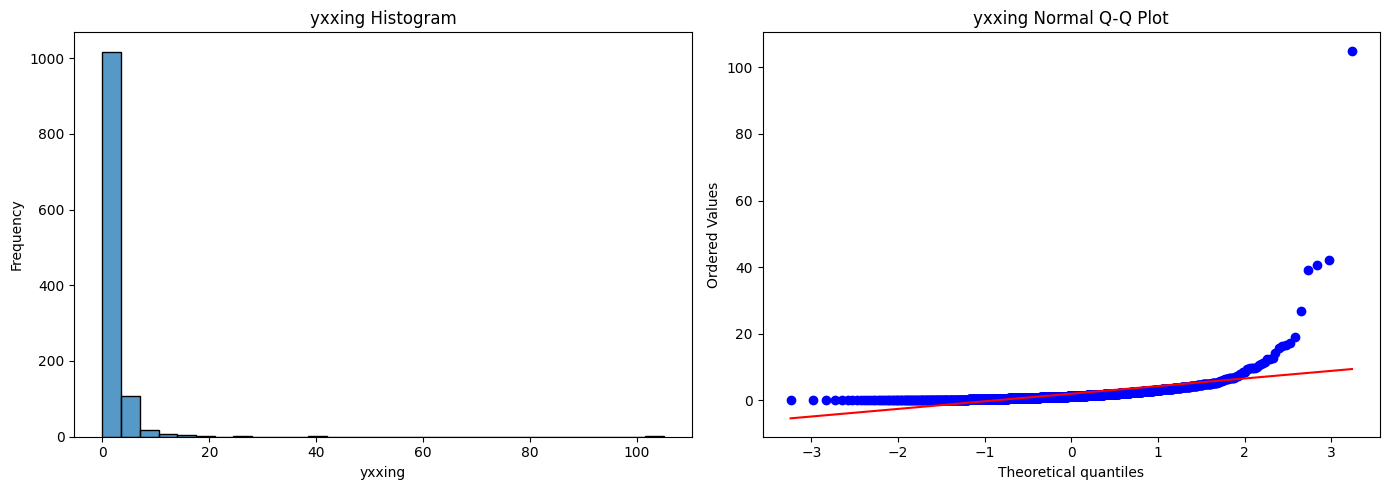

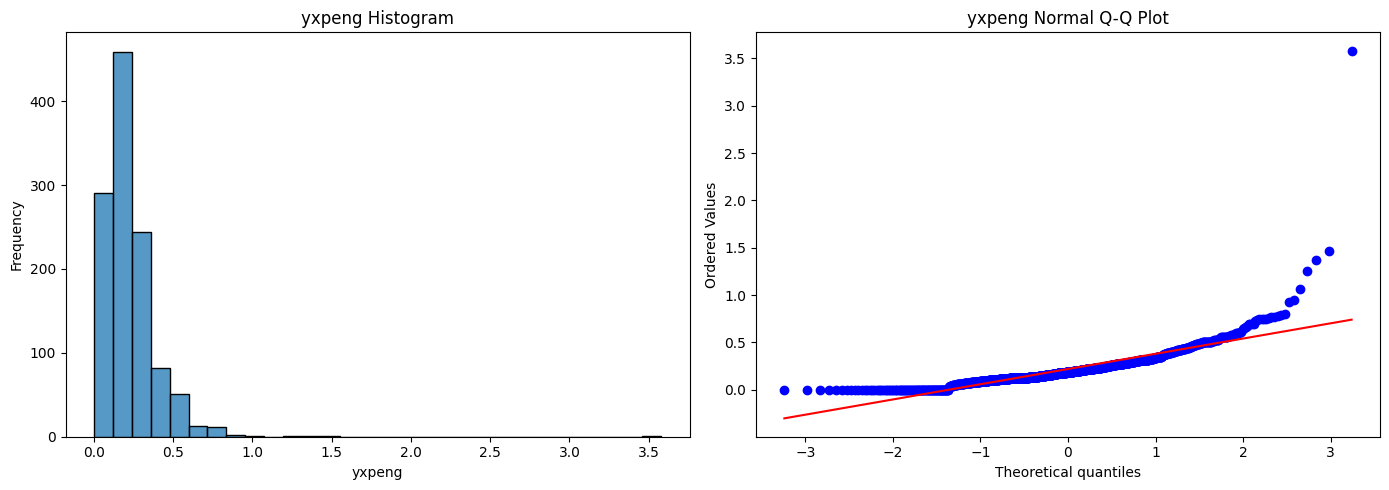

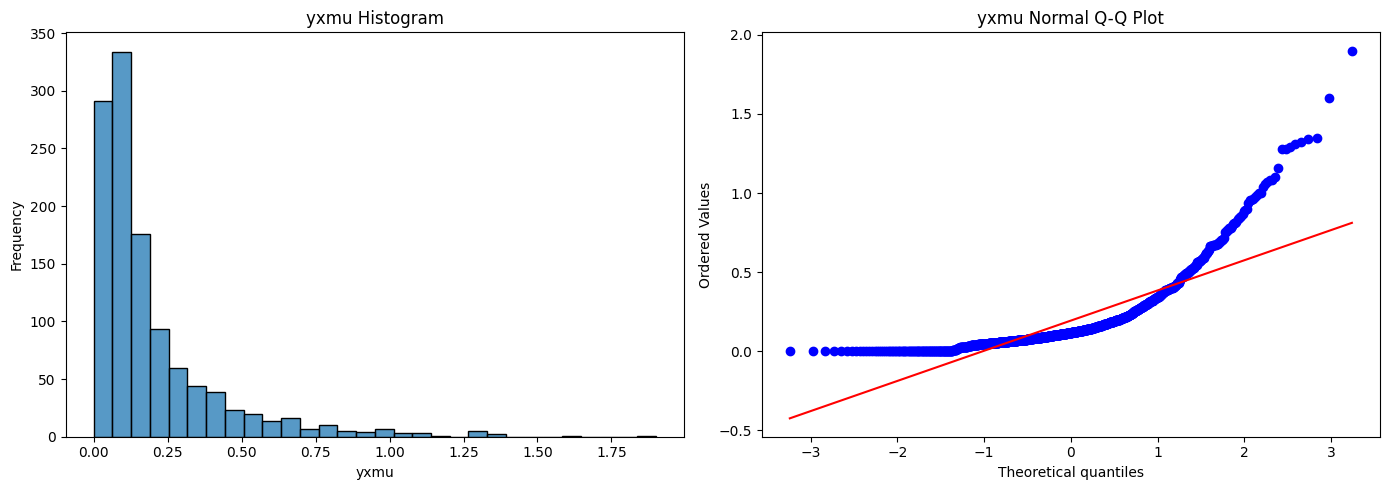

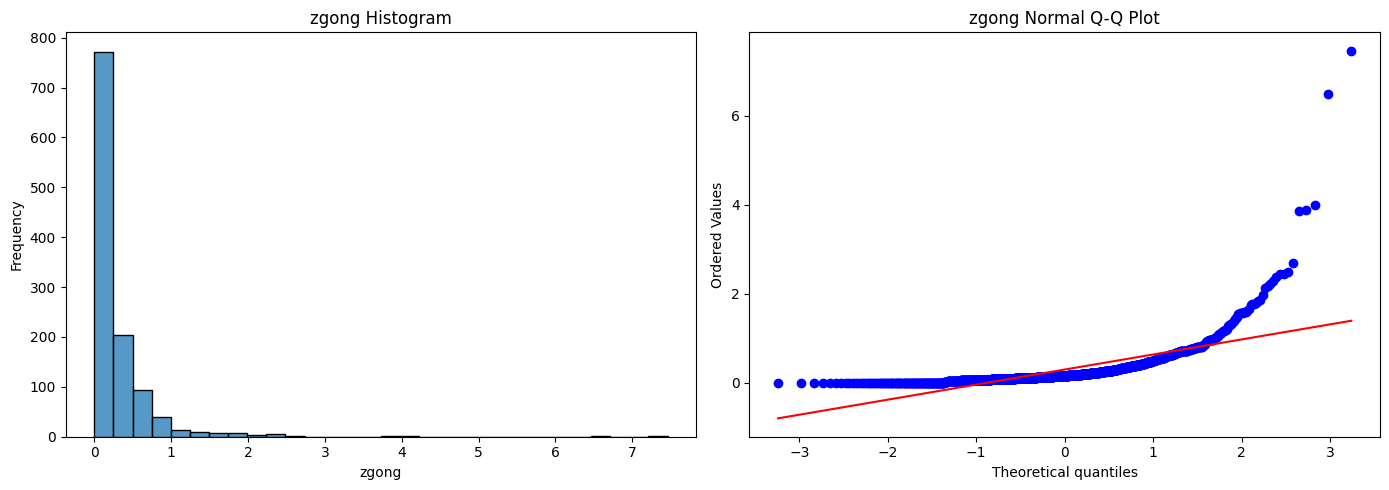

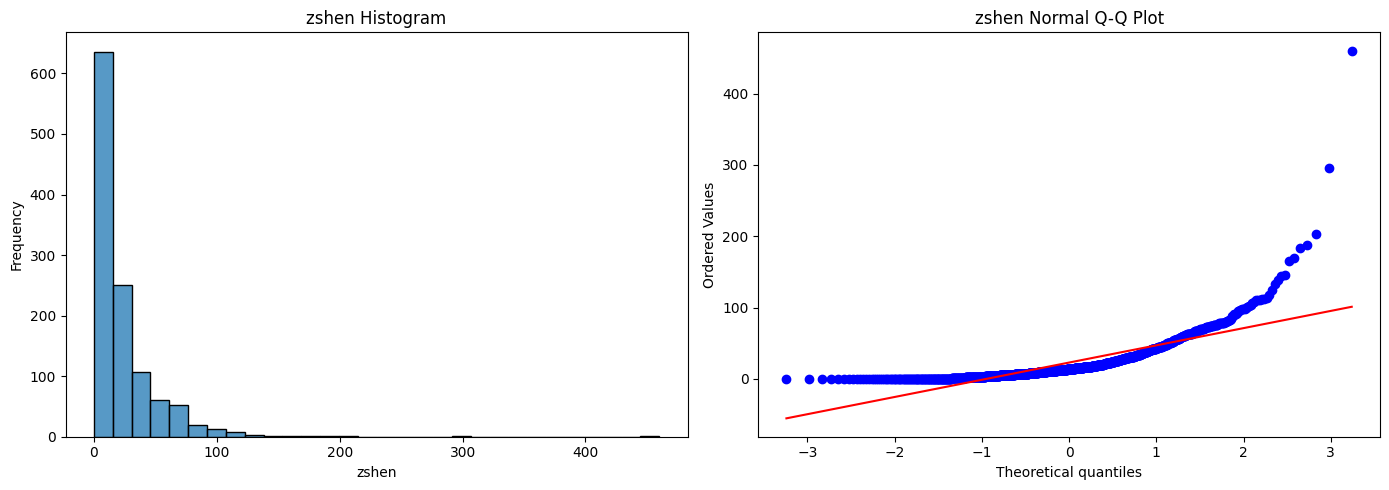

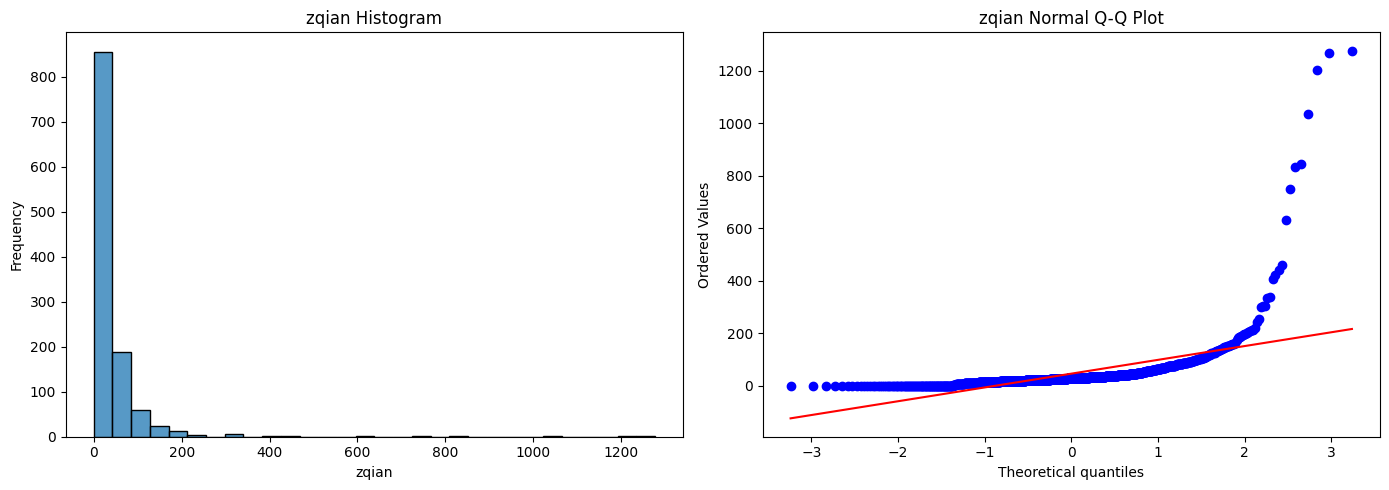

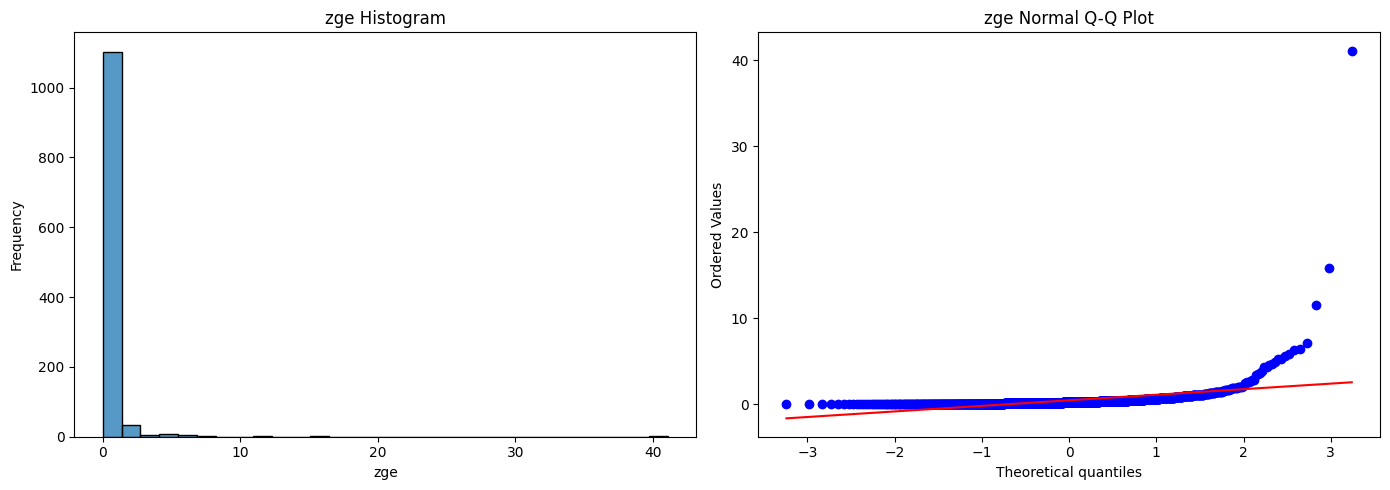

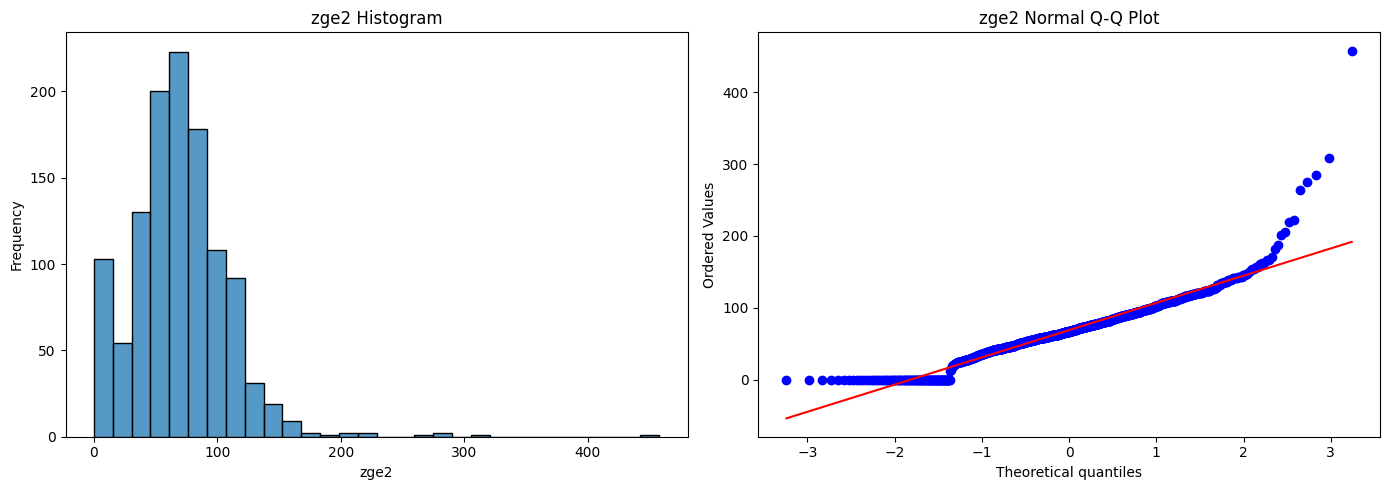

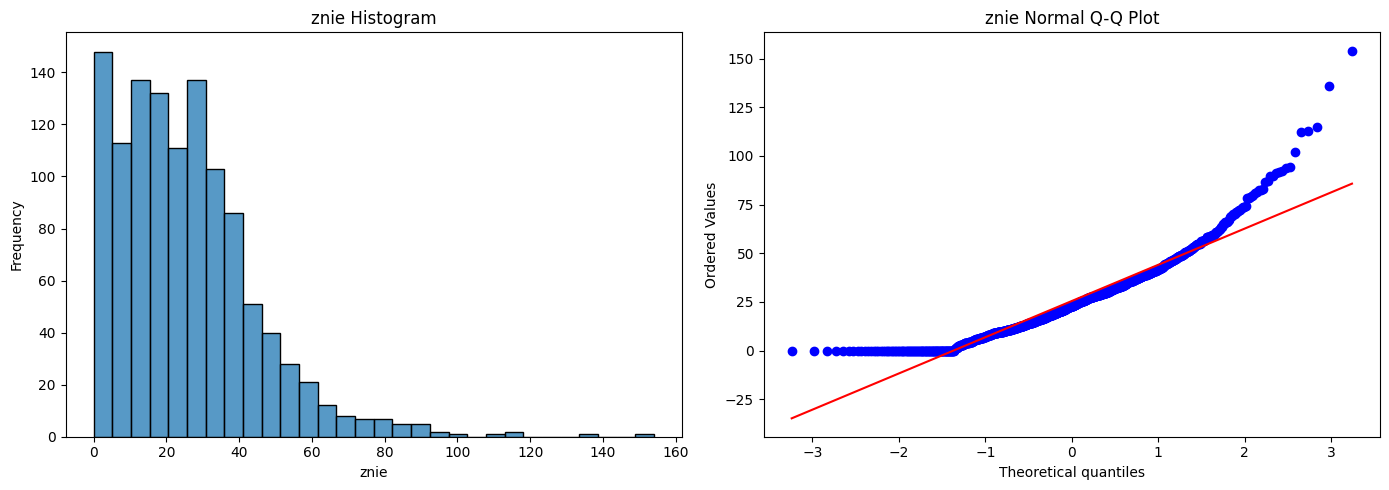

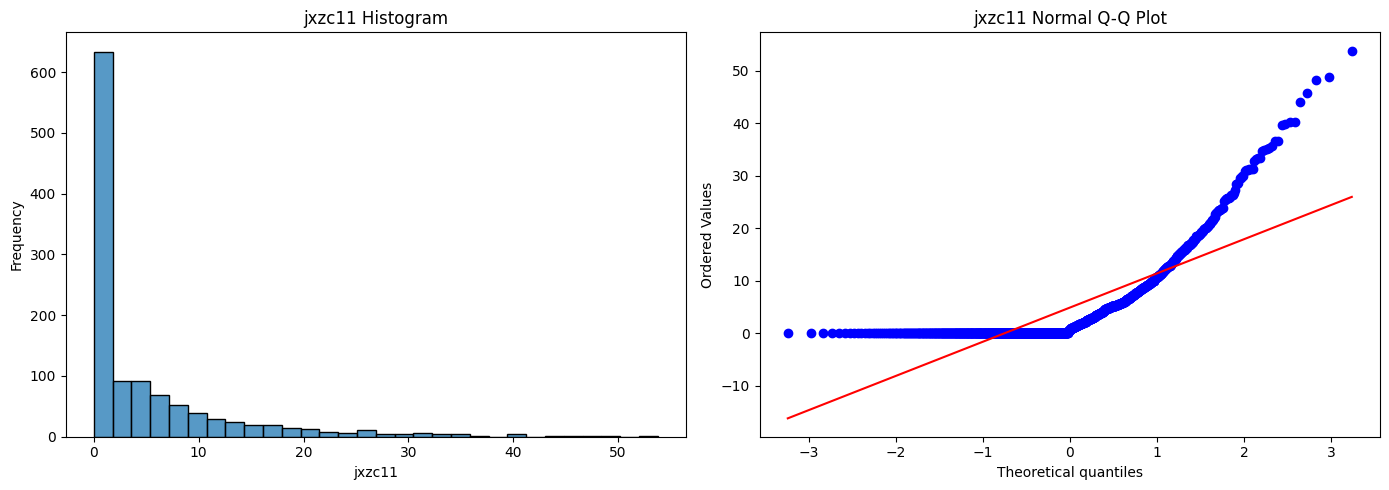

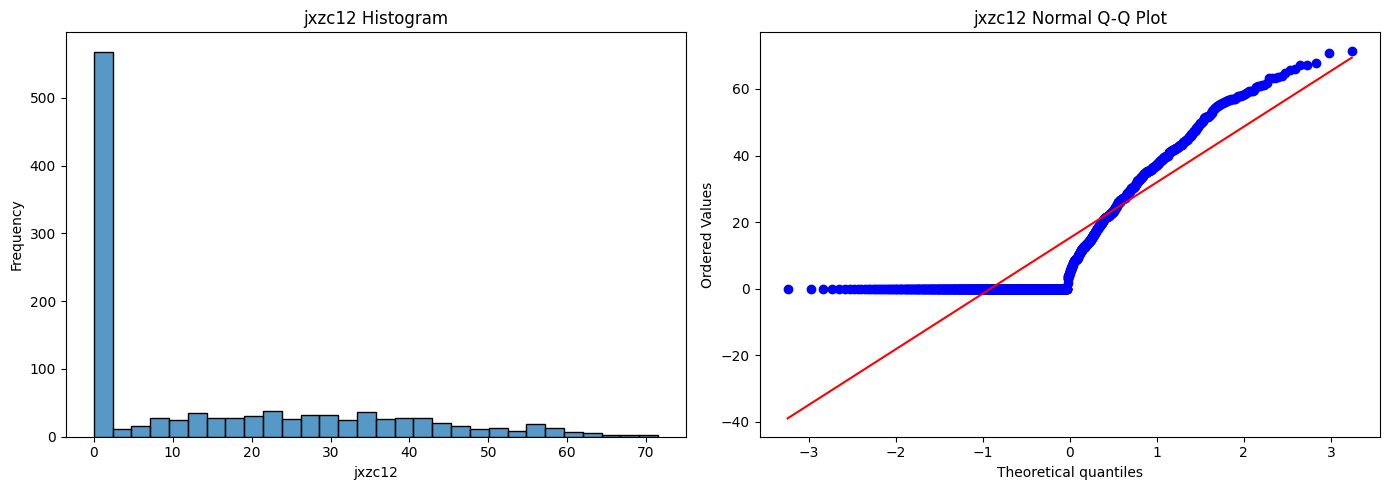

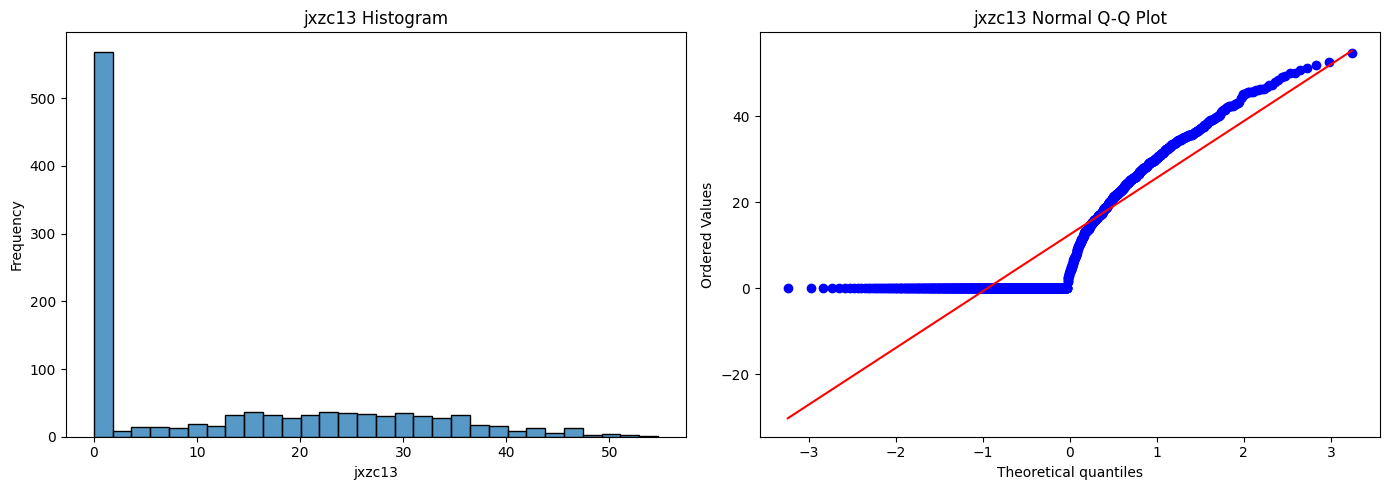

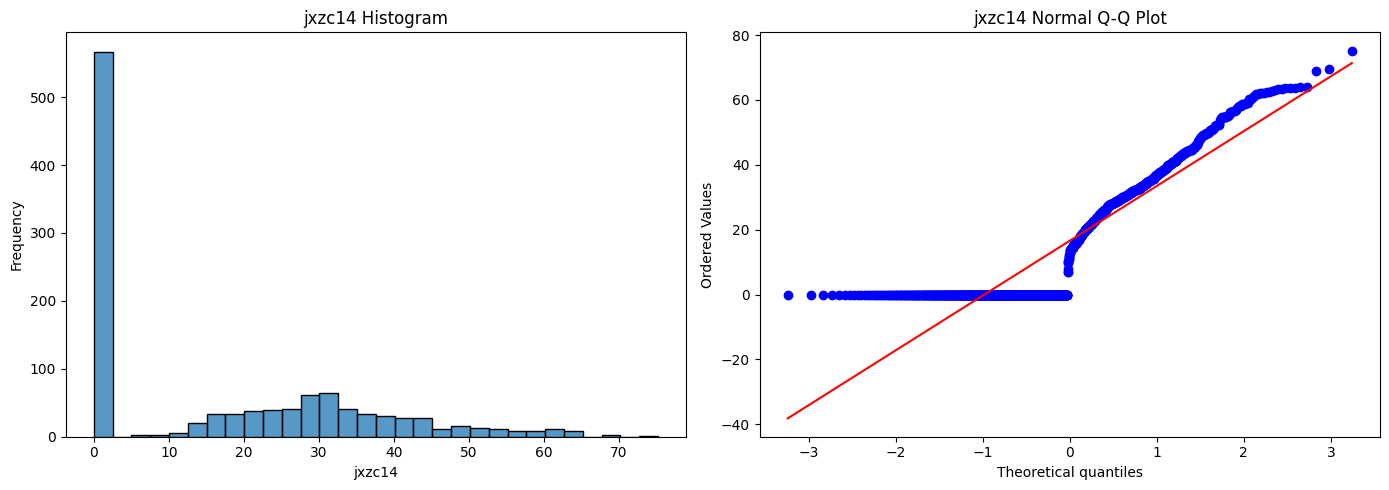

In [15]:
# 遍历df_result中的每一列
for column in df_result.columns[3:]:
    # 检查列的数据类型是否为数值型
    if pd.api.types.is_numeric_dtype(df_result[column]):
        # 创建一个图和两个子图
        fig, ax = plt.subplots(1, 2, figsize=(14, 5))

        # 在第一个子图上绘制直方图
        sns.histplot(df_result[column], kde=False, bins=30, ax=ax[0])
        ax[0].set_title(f'{column} Histogram')
        ax[0].set_xlabel(column)
        ax[0].set_ylabel('Frequency')

        # 在第二个子图上绘制正态分布检验图
        stats.probplot(df_result[column], plot=ax[1])
        ax[1].set_title(f'{column} Normal Q-Q Plot')

        # 调整布局并显示图
        plt.tight_layout()
        plt.show()
